# Práctica 4

# Dataset 2

Consultado en: https://www.kaggle.com/daiearth22/uniqlo-fastretailing-stock-price-prediction

# Tranformación de datos numéricos

## Recipe

La transformación de datos es una forma de hacer que los datos funcionen mejor al encontrar un modelo con métodos de aprendizaje automático. Las variables o características pueden ser de dos tipos: variable numérica y variable categórica, y su transformación debe tener diferentes enfoques.

![alt text](0.png "Title")

## Transformación de variables numéricas

Convertir una variable numérica en otra variable numérica. Típicamente, su objetivo es cambiar la escala de valores y/o ajustar la distribución sesgada de los datos a una distribución tal vez de tipo gaussiano mediante alguna "transformación monótona". Por ejemplo, los métodos basados en árboles de decisión (decision trees, random forest) son menos sensibles a la escala de valores y a los datos atípicos, caso contrario para otros métodos (por ejemplo, red neuronal, SVM, modelo lineal, etc.), donde se tienen que garantizar ciertos valores en los datos, o en algunos casos incluso de manera obligatoria utilizar alguna regularización, por ejemplo con la norma L1 o L2.

## Información general sobre la transformación de datos

Existen muchas técnicas de transformación de datos, entre ellas, hay muchas que utilizan parámetros, como la media y la desviación estándar de la normalización o una tabla de conversión en la codificación de categorías. Un error común en el uso de la transformación variable es transformar el conjunto de entrenamiento y el conjunto de pruebas por separado utilizando parámetros diferentes. La transformación de los datos de entrenamiento y los datos de prueba debe hacerse utilizando los mismos parámetros, y normalmente se obtienen del conjunto de entrenamiento; de lo contrario, no podemos comparar los resultados justamente.

![alt text](1.png "Title")

Algunos dirán más estrictamente que cuando se trabaje con validación cruzada, los parámetros de transformación se derivarán sólo del volúmen de entrenamiento (k-fold), entonces los datos del volúmen de validación se transformarán por esos parámetros, en lugar de transformar todos los datos de entrenamiento antes de la validación cruzada. Ese enfoque podría ser necesario cuando se prevé que hay enormes diferencias en la distribución de los datos entre los volúmen. La presencia de valores atípicos es una posible razón para dar parámetros diferentes, en particular en las técnicas de transformación sensibles a los valores atípicos, como la escala mín-máx.

De cualquier manera, los científicos de datos siempre tienen que preguntarse cuál es el enfoque más razonable para los datos a los que se enfrentan.

### Estandarización

La transformación más típica de una variable numérica es la transformación de los valores de la variable a otro conjunto de valores con media $\mu=0$ y desviación estándar $\sigma=1$ utilizando la resta y la división de tal manera que:

\begin{equation}
x_{i}^{'} = \frac{x_{i} - \overline{x}_{n}}{s}
\end{equation}

Donde $ \overline{x}_{n} = \frac{\sum_{i=1}^{n} x_{i}}{n}$ es la media y $ s= \sqrt{\frac{\sum_{i=1}^{n} (x_{i} - \overline{x}_{n})^{2}}{n}} $
$$

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
test = pd.read_csv('Uniqlo(FastRetailing) 2017 Test - stocks2017.csv')

In [2]:
train_data = train[['High']]
test_data = test[['High']]

In [3]:
scaler = StandardScaler()
scaler.fit(train_data)

print("train:\n", train_data.head(10))
print("\ntest:\n", test_data.head(10))

print("Transformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

print("\nMedia:", scaler.mean_)
print("\nDesviación Estándar:", scaler.var_)

train:
     High
0  42330
1  43220
2  43970
3  43700
4  43660
5  43840
6  44370
7  43630
8  43150
9  43550

test:
     High
0  39380
1  38450
2  38880
3  38850
4  41030
5  43330
6  43330
Transformación train:
           0
0  0.745638
1  0.827051
2  0.895658
3  0.870960
4  0.867301
5  0.883766
6  0.932248
7  0.864556
8  0.820648
9  0.857238

Transformación test:
           0
0  0.475785
1  0.390712
2  0.430047
3  0.427303
4  0.626720
5  0.837114
6  0.837114

Media: [34178.78466558]

Desviación Estándar: [1.19505688e+08]


### Escala min-max
La escala mín-máx es otra de las simples transformaciones de las variables numéricas. Con la escala mín-máx, los valores deben ser convertidos a los valores dentro de $[0,1]$.

\begin{equation}
x_{i}^{'} = \frac{x_{i} - {x}_{max}}{x_{max} - x_{min}}
\end{equation}

Donde $x_{max}$ es el valor máximo, y $x_{min}$ es el valor mínimo.

Esta transformación depende en gran medida del número máximo y del número mínimo y, por lo tanto, es particularmente sensible a los valores atípicos. Si los valores pueden ser extremadamente grandes mientras que muchos no lo son, la estandarización es más común. La escala mín-máx es más común en el caso de que los valores oscilen en el intervalo fijo y sea menos probable que los datos se agrupen en un subrango específico en el intervalo; por ejemplo en los datos de una imagen los elementos tiende a tener el valor entre 0 y 255 para su color RGB.

In [4]:
from sklearn.preprocessing import MinMaxScaler

print("train:\n", train_data.head(10))
print("test:\n", test_data.head(10))

scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

train:
     High
0  42330
1  43220
2  43970
3  43700
4  43660
5  43840
6  44370
7  43630
8  43150
9  43550
test:
     High
0  39380
1  38450
2  38880
3  38850
4  41030
5  43330
6  43330

Transformación train:
           0
0  0.591938
1  0.610430
2  0.626013
3  0.620403
4  0.619572
5  0.623312
6  0.634324
7  0.618949
8  0.608976
9  0.617287

Transformación test:
           0
0  0.530646
1  0.511323
2  0.520258
3  0.519634
4  0.564928
5  0.612716
6  0.612716


Consideramos un atributo que tiene un outlier. En este caso, es Stock Trading.

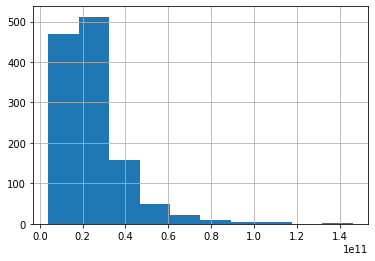

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

train['Stock Trading'].hist()
plt.show()

In [6]:
train_data = train[['Stock Trading']] # Data including outlier.
scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))


Transformación train:
           0
0  0.152464
1  0.107138
2  0.076116
3  0.094749
4  0.081516
5  0.088826
6  0.176157
7  0.124156
8  0.080676
9  0.136646


### Transformación logarítmica

Cuando la distribución de la variable tiene una distribución de larga duración (long-tailed distribution) (por ejemplo, ingresos individuales, gastos médicos individuales, etc.), las transformaciones logarítmicas pueden ajustar la distribución de los datos a una distribución menos sesgada, por ejemplo, de tipo gaussiano.

![alt text](2.jpg "Title2")

![alt text](3.png "Title")

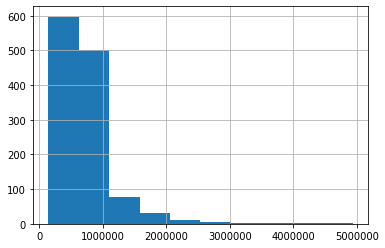

In [7]:
train.Volume.hist()
plt.show()

In [8]:
import numpy as np

train_data = train[['Volume']]
test_data = test[['Volume']]

print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(np.log1p(train_data)).head(10))

Train:
    Volume
0  610000
1  448400
2  339900
3  400100
4  358200
5  381600
6  658900
7  499400
8  358700
9  542000

Transformación train:
       Volume
0  13.321216
1  13.013443
2  12.736410
3  12.899472
4  12.788850
5  12.852131
6  13.398329
7  13.121165
8  12.790244
9  13.203023


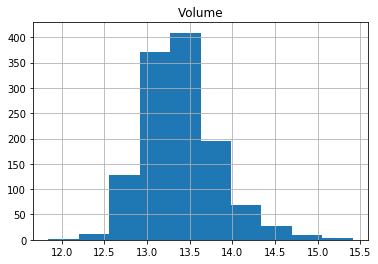

In [9]:
pd.DataFrame(np.log1p(train_data)).hist()
plt.show()

### Transformación de Box-Cox

La transformación de Box-Cox es una función compuesta con la transformación log(xi) y una transformación x−1 dependiendo del valor de lambda.

\begin{equation}
x_{i}^{' \lambda} = \left\{
                \begin{array}{ll}
              \frac{x_{i}^{ \lambda} -1}{\lambda} \hspace{0.2cm} if \hspace{0.2cm} \lambda \neq 0 \\
                  log x_{i} 
\hspace{0.2cm} \lambda = 0
                \end{array}
              \right.
              \end{equation}
              
La función PowerTransformer de la librería scikit-learn puede manejar esta transformación y seleccionar automáticamente lambda para hacer que los datos sean lo más parecido a una distribución Gaussiana.

![alt text](4.png "Title")

![alt text](5.png "Title")

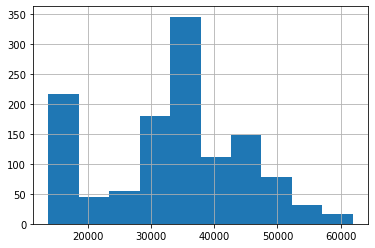

In [10]:
train.Close.hist()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

train_data = train[['Close']]

pt = PowerTransformer(method='box-cox')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambda:", pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación Estándar:", np.std(train_data_trans)) 

Train:
    Close
0  41830
1  42660
2  43270
3  43620
4  43340
5  43480
6  44000
7  43620
8  43130
9  43130

Transformación train:
           0
0  0.747894
1  0.823922
2  0.879765
3  0.911794
4  0.886171
5  0.898983
6  0.946558
7  0.911794
8  0.866951
9  0.866951

Lambda: [0.96540329]

Media: -4.1728447777102133e-16

Desviación Estándar: 1.0


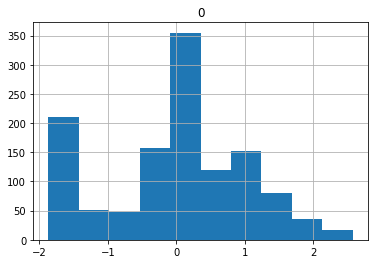

In [12]:
pd.DataFrame(train_data_trans).hist()
plt.show()

### Transformación Yeo-Johnson

La transformación de Yeo-Johnson es una función compuesta de transformación que permite valores negativos, a diferencia de la transformación de Box-Cox.

![alt text](6.png "Title")

Con lambda=1, la transformación es una transformación casi de identidad. El cambio en lambda afecta al valor transformado como se muestra en el siguiente gráfico.

![alt text](7.png "Title")

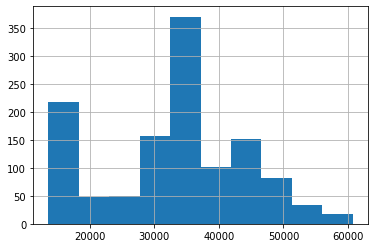

In [16]:
train.Low.hist()
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

train_data = train[['Low']]

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambdas:",pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación estándar:", np.std(train_data_trans)) 

train:
      Low
0  41700
1  42540
2  43270
3  43140
4  43090
5  43190
6  43610
7  42860
8  42740
9  42810

Transformación train:
           0
0  0.782895
1  0.860363
2  0.927625
3  0.915651
4  0.911045
5  0.920256
6  0.958933
7  0.889854
8  0.878796
9  0.885247

Lambdas: [0.95130578]

Media: -4.636494197455792e-16

Desviación estándar: 1.0


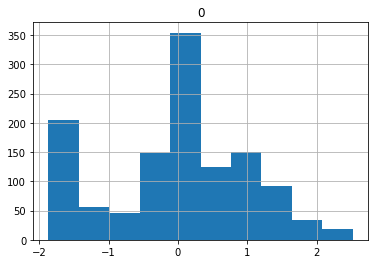

In [20]:
pd.DataFrame(train_data_trans).hist()
plt.show()

### Recorte

El recorte (clipping) es un enfoque para limitar o reducir los valores en puntos de valor específicos. Esto puede eliminar los valores atípicos, a costa de una posible pérdida de información de datos. El recorte se puede hacer fácilmente por medio de la función de clip de pandas o numpy. El siguiente código recorta los valores en el 1% y el 99% de los datos.

In [23]:
# Multiple columns can be clipped at once.

df= train[['Low', 'High']]

p25 = df.quantile(0.25)
p75 = df.quantile(0.75)
print("p25:\n", p25)
print("p75:\n", p75)

p25:
 Low     27401.25
High    28091.25
Name: 0.25, dtype: float64
p75:
 Low     40810.0
High    41900.0
Name: 0.75, dtype: float64


In [24]:
df.head(10)

,Low,High
0,41700,42330
1,42540,43220
2,43270,43970
3,43140,43700
4,43090,43660
5,43190,43840
6,43610,44370
7,42860,43630
8,42740,43150
9,42810,43550


In [22]:
data = {'Low': train['Low'], 'High': train['High']}
df = pd.DataFrame(data)

df[['Low', 'High']] = df[['Low', 'High']].clip(p25,p75,axis=1).astype('int')
df.head(10)

,Low,High
0,40810,41900
1,40810,41900
2,40810,41900
3,40810,41900
4,40810,41900
5,40810,41900
6,40810,41900
7,40810,41900
8,40810,41900
9,40810,41900


### Binning

En Binning se agrupan los valores a intervalos distintos, y se utiliza un índice de grupo representativa de cada intervalo como una variable categórica. Se puede usar como una variable categórica ordinal o una variable numérica discreta tipo rango (discretizada). Como variable categórica también se puede trasnformar a numérica, mediante una codificación de un solo golpe (one-hot encoding) u otras transformaciones de variables categóricas.

La determinación de los intervalos es el parámetro del método, y puede ser por intervalos regulares, puntos de percentil, u otra configuración manual basada en el conocimiento del dominio sobre los datos. El binning puede hacerse mediante la función de cut de pandas o la función de digitize de numpy.

In [26]:
#when bins is integer, it will be the number of bins and bin widths are to be equal.

df= pd.DataFrame(train['Open'], columns=['Open'])

df['Open_binned'] = pd.cut(df['Open'], bins=10, labels=False) 
df[['Open','Open_binned']].head(10)

,Open,Open_binned
0,42120,5
1,43000,6
2,43940,6
3,43140,6
4,43310,6
5,43660,6
6,43900,6
7,42910,6
8,42790,6
9,43350,6


### Rango

Este método funciona convirtiendo los valores numéricos en rangos de valores. Cuando se analiza el número de clientes en una tienda, es probable que el número de clientes en días festivos sea mucho mayor que el de los días de semana. Cambiar los números a rangos puede neutralizar el impacto del número absoluto de clientes.

La función rank de pandas o la función argsort de numpy puede manejar esta transformación.

In [28]:
df = pd.DataFrame(train['Open'], columns=['Open'])
df['Open_rank'] = df.Open.rank().astype('int')  #the rank of values starting from 1
df.head(10)

,Open,Open_rank
0,42120,937
1,43000,964
2,43940,1015
3,43140,973
4,43310,984
5,43660,1004
6,43900,1010
7,42910,960
8,42790,952
9,43350,987


### RankGauss

RankGauss es un enfoque para convertir los valores a rangos, y después convierte estos rangos a otro valor numérico siguiendo una distribución Gaussiana (ver el gráfico a continuación.)

![alt text](8.png "Title")

Esto se utilizó en la solución de primer lugar de la Predicción de Conductores Seguros de Porto Segro Porto Segro’s Safe Driver Prediction first place solution para su modelo de red neural. El ganador del primer lugar, Michael Jahrer, afirmó que funcionaba mejor que la estandarización o el escalamiento mín-máx para su modelo de red neuronal.

La función QuantileTransformer en sklearn.preprocessing puede manejar esta transformación estableciendo los parámetros n_quantiles (se recomiendan valores grandes) y output_distribution = 'normal'.

In [29]:
from sklearn.preprocessing import QuantileTransformer

data = {'Low': train['Low'], 'High': train['High']}
df = pd.DataFrame(data)
    
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['Low']])
df['Low_RankGauss'] = transformer.transform(df[['Low']])
df[['Low','Low_RankGauss']].head(10)

,Low,Low_RankGauss
0,41700,0.730235
1,42540,0.794594
2,43270,0.861412
3,43140,0.849237
4,43090,0.844587
5,43190,0.853904
6,43610,0.893877
7,42860,0.823431
8,42740,0.812538
9,42810,0.818880


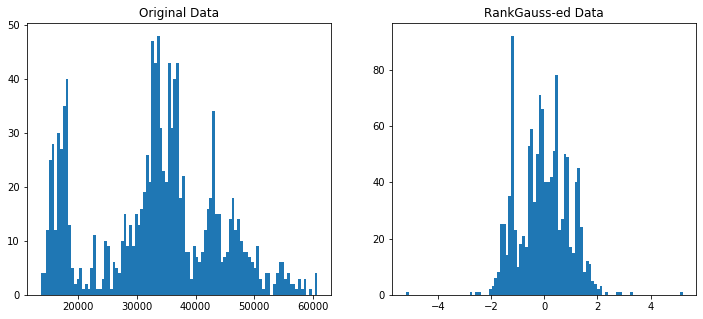

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['Low'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(df['Low_RankGauss'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()